In [2]:
import numpy as np

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

 

def init(inp, out):
     return np.random.randn(inp, out) / np.sqrt(inp)

def create_architecture(input_layer, first_layer, output_layer, random_seed=0):

    np.random.seed(random_seed)
    layers = X.shape[1], 3 , 1
    arch = list(zip(layers[:-1], layers[1:]))
    weights = [init(inp, out) for inp, out in arch]
    
     return weights

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_prime(s):
    return s * (1 -s)

In [4]:
def feed_forward(X, weights):

    a = X.copy()
    out = list()
    
    for W in weights:
        z = np.dot(a, W)
        a = sigmoid(z)

    return out

In [5]:
def accuracy(true_label, predicted):
    correct_preds = np.ravel(predicted)==true_label

    return np.sum(correct_preds) / len(true_label)

In [6]:
def backpropagation(l1, l2, weights, y):

    l2_error = y.reshape(-1, 1) - l2

    l2_delta = l2_error * sigmoid_prime(l2)

    l1_error = l2_delta.dot(weights[1].T)

    l1_delta = l1_error * sigmoid_prime(l1)

    return l2_error, l1_delta, l2_delta

In [9]:
def update_weights(X, l1, l1_delta, l2_delta, weights,alpha=1.0):

    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta))

    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta))

    return weights

In [8]:
def predict(X, weights):

    _, l2 = feed_forward(X, weights)

    preds = np.ravel((l2 > 0.5).astype(int))

    return preds

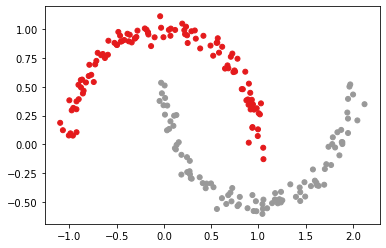

In [10]:
import numpy as np

np.random.seed(0)

coord, cl = make_moons(300, noise=0.05)

X, Xt, y, yt = train_test_split(coord, cl, test_size=0.30, random_state=0)

plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Set1)

plt.show()

In [12]:
weights = create_architecture(X, 3, 1)

for j in range(30000 + 1):

    # Feed forward para as camadas ocultas
    l1, l2 = feed_forward(X, weights)

    # Backpropagation do output ao input
    l2_error, l1_delta, l2_delta = backpropagation(l1, l2, weights, y)

    # Atualização dos pesos
    weights = update_weights(X, l1, l1_delta, l2_delta, weights, alpha=0.05)

    # Reporte os resultados, individualmente

    if (j % 5000) == 0:

        train_error = np.mean(np.abs(l2_error))

        print('Epoch {:5}'.format(j), end=' - ')

        print('error: {:0.4f}'.format(train_error), end= ' - ')

        train_accuracy = accuracy(true_label=y,predicted=(l2 > 0.5))

        test_preds = predict(Xt, weights)

        test_accuracy = accuracy(true_label=yt,predicted=test_preds)

        print(f'acc: treino {train_accuracy:.3f}', end= ' | ')

        print(f'teste {test_accuracy:.3f}')

Epoch     0 - error: 0.5077 - acc: treino 0.462 | teste 0.656
Epoch  5000 - error: 0.0991 - acc: treino 0.952 | teste 0.944
Epoch 10000 - error: 0.0872 - acc: treino 0.952 | teste 0.944
Epoch 15000 - error: 0.0810 - acc: treino 0.957 | teste 0.956
Epoch 20000 - error: 0.0758 - acc: treino 0.967 | teste 0.956
Epoch 25000 - error: 0.0729 - acc: treino 0.967 | teste 0.956
Epoch 30000 - error: 0.0794 - acc: treino 0.957 | teste 0.967
